In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTENC
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Exploratory Data Analysis
Before planning anything, we'll have a look at the data structure, and see if we can find any patterns/oddities. by examining the distribution of the target variable and the distribution of the features. 


In [2]:
df = pd.read_csv("Base.csv")

In [3]:
df.head(5)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.3,0.986506,-1,25,40,0.006735,102.453711,AA,1059,...,0,1500.0,0,INTERNET,16.224843,linux,1,1,0,0
1,0,0.8,0.617426,-1,89,20,0.010095,-0.849551,AD,1658,...,0,1500.0,0,INTERNET,3.363854,other,1,1,0,0
2,0,0.8,0.996707,9,14,40,0.012316,-1.490386,AB,1095,...,0,200.0,0,INTERNET,22.730559,windows,0,1,0,0
3,0,0.6,0.475100,11,14,30,0.006991,-1.863101,AB,3483,...,0,200.0,0,INTERNET,15.215816,linux,1,1,0,0
4,0,0.9,0.842307,-1,29,40,5.742626,47.152498,AA,2339,...,0,200.0,0,INTERNET,3.743048,other,0,1,0,0


In [4]:
df.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,session_length_in_minutes,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.0,1000000.000000
mean,0.011029,0.562696,0.493694,16.718568,86.587867,33.689080,1.025705e+00,8.661499,1572.692049,5665.296605,...,0.889676,10.839303,0.222988,515.851010,0.025242,7.544940,0.576947,1.018312,0.0,3.288674
std,0.104438,0.290343,0.289125,44.046230,88.406599,12.025799,5.381835e+00,20.236155,1005.374565,3009.380665,...,0.313293,12.116875,0.416251,487.559902,0.156859,8.033106,0.494044,0.180761,0.0,2.209994
min,0.000000,0.100000,0.000001,-1.000000,-1.000000,10.000000,4.036860e-09,-15.530555,1.000000,-170.603072,...,0.000000,-1.000000,0.000000,190.000000,0.000000,-1.000000,0.000000,-1.000000,0.0,0.000000
25%,0.000000,0.300000,0.225216,-1.000000,19.000000,20.000000,7.193246e-03,-1.181488,894.000000,3436.365848,...,1.000000,-1.000000,0.000000,200.000000,0.000000,3.103053,0.000000,1.000000,0.0,1.000000
50%,0.000000,0.600000,0.492153,-1.000000,52.000000,30.000000,1.517574e-02,-0.830507,1263.000000,5319.769349,...,1.000000,5.000000,0.000000,200.000000,0.000000,5.114321,1.000000,1.000000,0.0,3.000000
75%,0.000000,0.800000,0.755567,12.000000,130.000000,40.000000,2.633069e-02,4.984176,1944.000000,7680.717827,...,1.000000,25.000000,0.000000,500.000000,0.000000,8.866131,1.000000,1.000000,0.0,5.000000
max,1.000000,0.900000,0.999999,383.000000,428.000000,90.000000,7.845690e+01,112.956928,6700.000000,16715.565404,...,1.000000,32.000000,1.000000,2100.000000,1.000000,85.899143,1.000000,2.000000,0.0,7.000000


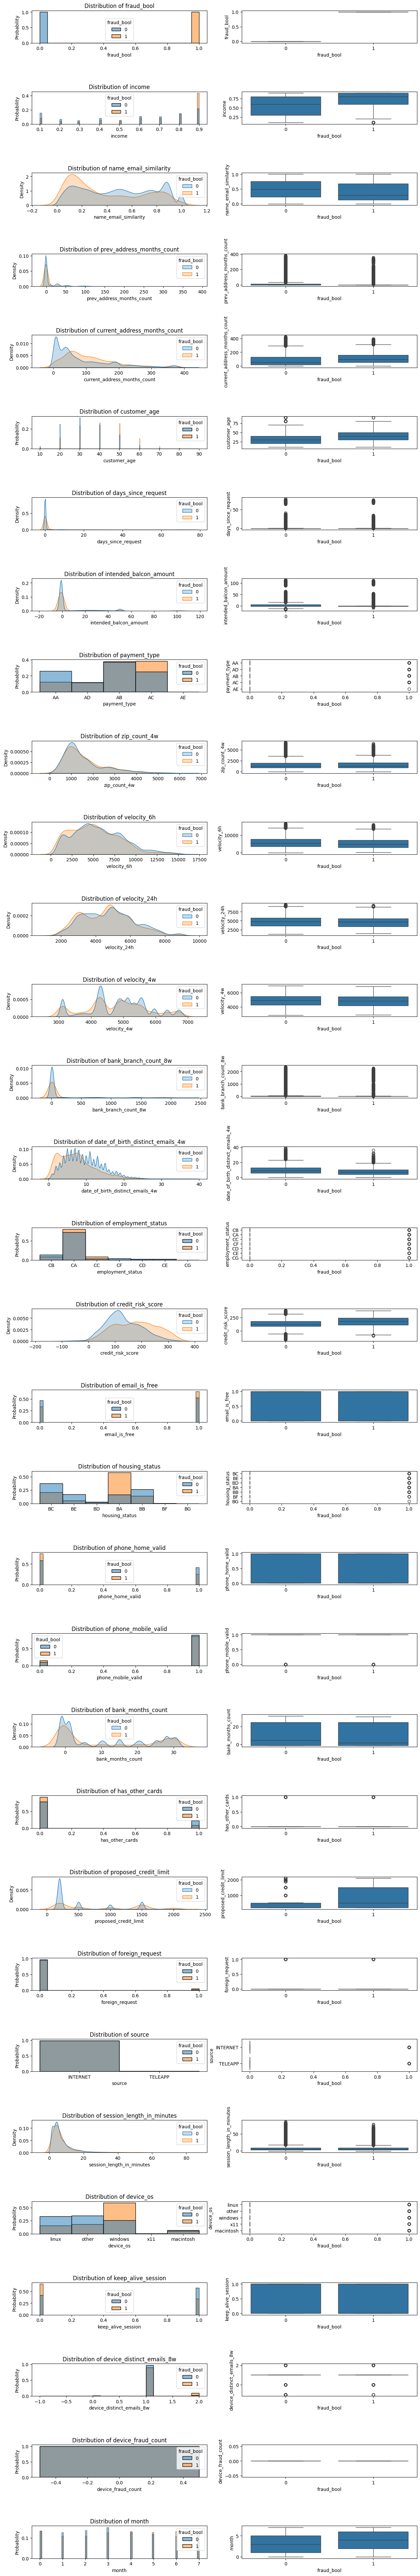

In [5]:
fig, axes = plt.subplots(len(df.columns),2, figsize=(15,100))
plt.subplots_adjust(hspace=1.5)

for i, col in enumerate(df.columns):

    axes[i,0].set_title(f"Distribution of {col}")
    if len(df[col].unique()) > 10:
        sns.kdeplot(df, x=col, hue="fraud_bool", fill=True,  ax=axes[i,0], common_norm=False)
    else:
        sns.histplot(x=col, hue="fraud_bool", data=df, ax=axes[i,0], stat="probability", common_norm=False)
    
    #sns.kdeplot(df, x=col, hue="fraud_bool", fill=True, common_norm=False, ax=axes[i,0])
    sns.boxplot(x="fraud_bool", y=col, data=df , ax=axes[i,1])

### A few observations:

1. There is a big class imbalance. 1% of transactions are labelled as fraudulent, we'll have to adress this later.
2. There are a few categorical features that we will encode using one-hot encoding.
3. Some numerical features are heavily skewed, we will have to do some transformation to help some models.
4. Some columns have a lot of missing values (-1), those missing values seem significant, so we will encode them with a new feature, and replace them with the mean.


In [6]:
missing_values_columns = ["prev_address_months_count","current_address_months_count","bank_months_count"]
missing_values_flag_columns = ["prev_address_months_count_flag","current_address_months_count_flag","bank_months_count_flag"]

df["prev_address_months_count_flag"] = (df["prev_address_months_count"]==-1).astype(int)
df["current_address_months_count_flag"] = (df["current_address_months_count"]==-1).astype(int)
df["bank_months_count_flag"] = (df["bank_months_count"]==-1).astype(int)

prev_address_months_count_mean = df[df["prev_address_months_count"]!=-1]["prev_address_months_count"].mean()
df["prev_address_months_count"] = df["prev_address_months_count"].replace(-1, prev_address_months_count_mean)

current_address_months_count_mean = df[df["prev_address_months_count"]!=-1]["prev_address_months_count"].mean()
df["current_address_months_count"] = df["current_address_months_count"].replace(-1,current_address_months_count_mean)

bank_months_count_mean = df[df["prev_address_months_count"]!=-1]["prev_address_months_count"].mean()
df["bank_months_count"] = df["bank_months_count"].replace(-1,bank_months_count_mean)


<Axes: ylabel='Frequency'>

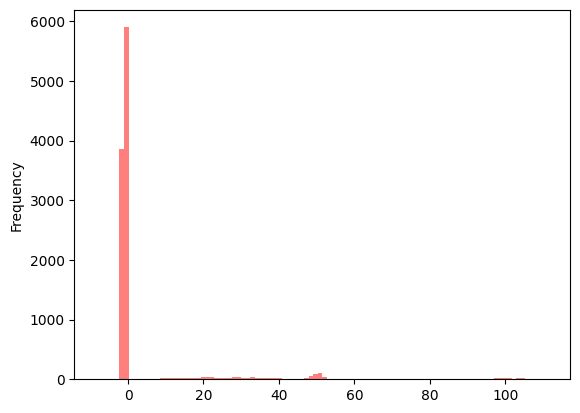

In [7]:
df[df["fraud_bool"]==1]["intended_balcon_amount"].plot.hist(bins=100, alpha=0.5, color='red', label='Fraud')

To adress the skew in the numerical features, we simply apply a log transformation.

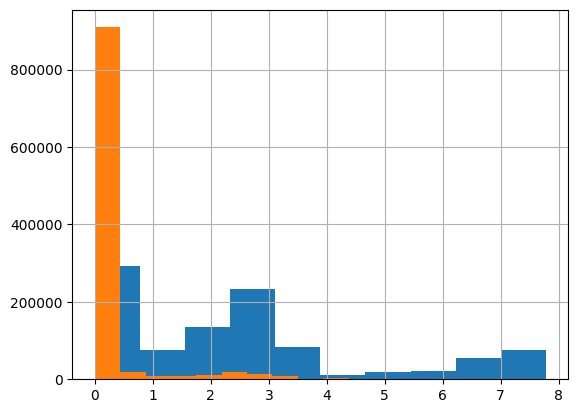

In [8]:
df["bank_branch_count_8w"].apply(lambda x : np.log(x+1)).hist()

df["bank_branch_count_8w"] = df["bank_branch_count_8w"].apply(lambda x : np.log(x+1))

df["days_since_request"].apply(lambda x : np.log(x+1)).hist()
df["days_since_request"] = df["days_since_request"].apply(lambda x : np.log(x+1))

df["positive_intented_balcon_amount"] = df["intended_balcon_amount"].apply(lambda x : np.log(1+x) if x>0 else 0)

df["negative_intented_balcon_amount"] = df["intended_balcon_amount"].apply(lambda x : np.log(1-x) if x<0 else 0)

We one-hot encode the categorical features

In [9]:
categorical_columns = ["device_os","source", "housing_status", "employment_status", "payment_type"]
# create one hot encoding
df = pd.get_dummies(df, columns=categorical_columns)
categorical_columns = [col for col in df.columns if "device_os" in col or "source" in col or "housing_status" in col or "employment_status" in col or "payment_type" in col or "_flag" in col]
df

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,employment_status_CC,employment_status_CD,employment_status_CE,employment_status_CF,employment_status_CG,payment_type_AA,payment_type_AB,payment_type_AC,payment_type_AD,payment_type_AE
0,0,0.3,0.986506,60.719967,25.0,40,0.006713,102.453711,1059,13096.035018,...,False,False,False,False,False,True,False,False,False,False
1,0,0.8,0.617426,60.719967,89.0,20,0.010044,-0.849551,1658,9223.283431,...,False,False,False,False,False,False,False,False,True,False
2,0,0.8,0.996707,9.000000,14.0,40,0.012241,-1.490386,1095,4471.472149,...,False,False,False,False,False,False,True,False,False,False
3,0,0.6,0.475100,11.000000,14.0,30,0.006967,-1.863101,3483,14431.993621,...,False,False,False,False,False,False,True,False,False,False
4,0,0.9,0.842307,60.719967,29.0,40,1.908449,47.152498,2339,7601.511579,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,0,0.8,0.124690,60.719967,143.0,30,0.050074,-0.826239,530,6732.602414,...,False,False,False,False,False,False,True,False,False,False
999996,0,0.9,0.824544,60.719967,193.0,30,0.009545,0.008307,408,1574.293294,...,False,False,False,False,False,False,False,True,False,False
999997,0,0.8,0.140891,60.719967,202.0,10,0.057596,50.609995,749,1258.864938,...,False,False,False,False,False,True,False,False,False,False
999998,0,0.9,0.002480,52.000000,3.0,30,0.023089,-1.313387,707,7048.137128,...,False,False,False,False,False,False,True,False,False,False


## Fitting a model
To adress the class imbalance, we will use SMOTENC, a variant of SMOTE that can handle categorical features. We will use it to oversample the minority class.
We'll split the data into a training and a testing set. We will use simple models with few parameters to avoid overfitting. 
For classifying tabular data, random forests are often a solid choice. They do not need rescaling, and are not too sensitive to outliers, we hope they'll be able to generalize the over sampled class well enough.  


In [10]:
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[0,1], normalize="true")
    sns.heatmap(cm, annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("True")



In [12]:
sm = SMOTENC(random_state=0, categorical_features=categorical_columns)

In [13]:
train_df = df.sample(frac=0.8,random_state=200)
val_df = df.drop(train_df.index)

In [14]:
X_res, y_res = sm.fit_resample(train_df.drop("fraud_bool", axis=1), train_df["fraud_bool"])

In [15]:
y_res.value_counts()

fraud_bool
0    791172
1    791172
Name: count, dtype: int64

In [16]:
rf_res = RandomForestClassifier(n_estimators=100, max_depth=10)

In [17]:
rf_res.fit(X_res, y_res)

RandomForestClassifier(max_depth=10)

In [18]:
only_fraud = val_df[val_df["fraud_bool"]==1]

In [19]:
rf_res.score(val_df.drop("fraud_bool", axis=1), val_df["fraud_bool"])

0.94132

In [20]:
rf_res.score(only_fraud.drop("fraud_bool", axis=1), only_fraud["fraud_bool"])

0.40663334847796456

We've got a overhaul score of 94% on the test set, that would look pretty good, except that the dataset is heavily imbalanced, and it only has a true positive rate of 41%

Area under ROC curve 0.8460920942468456


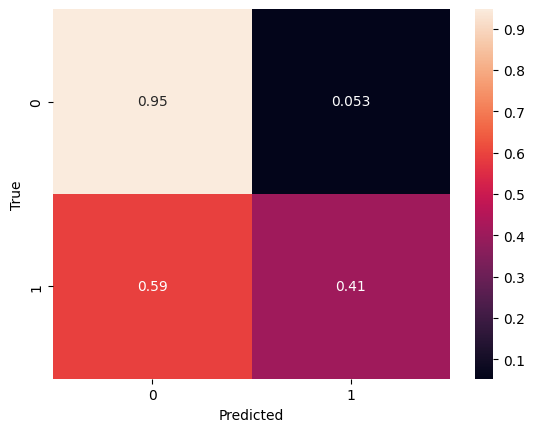

In [21]:
print("Area under ROC curve", roc_auc_score(val_df["fraud_bool"], rf_res.predict_proba(val_df.drop("fraud_bool", axis=1))[:,1]))
plot_confusion_matrix(val_df["fraud_bool"], rf_res.predict(val_df.drop("fraud_bool", axis=1)))

We will use XGBoost to get a little more speed, if we wanted to optimize hyperparameter, it would be much faster.

In [22]:
from xgboost import XGBClassifier

In [23]:
xgb = XGBClassifier(eta=0.003, max_depth=6, n_estimators=100, eval_metric="rmse")

In [24]:
xgb.fit(X_res, y_res)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.003, eval_metric='rmse',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [25]:
xgb.score(val_df.drop("fraud_bool", axis=1), val_df["fraud_bool"])

0.885575

In [26]:
xgb.score(only_fraud.drop("fraud_bool", axis=1), only_fraud["fraud_bool"])

0.5106769650159019

Area under ROC curve 0.8460920942468456


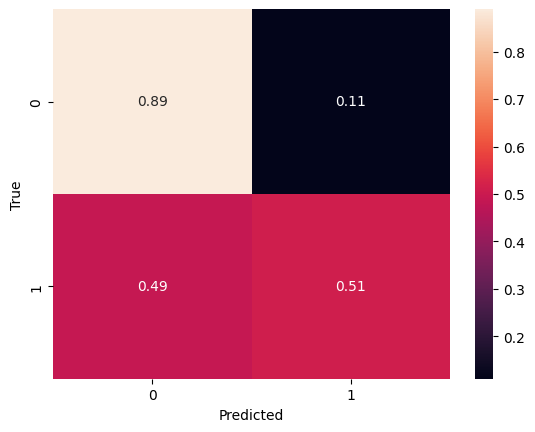

In [27]:
print("Area under ROC curve", roc_auc_score(val_df["fraud_bool"], rf_res.predict_proba(val_df.drop("fraud_bool", axis=1))[:,1]))

plot_confusion_matrix(val_df["fraud_bool"], xgb.predict(val_df.drop("fraud_bool", axis=1)))

In [28]:
df.drop("fraud_bool", axis=1).columns[rf_res.feature_importances_.argsort()[::-1]]

Index(['keep_alive_session', 'phone_home_valid', 'housing_status_BA',
       'device_os_linux', 'prev_address_months_count_flag', 'device_os_other',
       'customer_age', 'housing_status_BB', 'has_other_cards',
       'device_os_windows', 'negative_intented_balcon_amount',
       'current_address_months_count', 'housing_status_BE',
       'housing_status_BC', 'bank_months_count', 'payment_type_AA', 'income',
       'employment_status_CB', 'positive_intented_balcon_amount',
       'employment_status_CA', 'device_os_macintosh', 'proposed_credit_limit',
       'prev_address_months_count', 'payment_type_AD',
       'intended_balcon_amount', 'credit_risk_score', 'name_email_similarity',
       'phone_mobile_valid', 'bank_branch_count_8w', 'days_since_request',
       'bank_months_count_flag', 'date_of_birth_distinct_emails_4w',
       'payment_type_AB', 'payment_type_AC', 'velocity_4w',
       'housing_status_BD', 'velocity_6h', 'employment_status_CF', 'month',
       'velocity_24h', 'empl

Partial Dependence Plot


In [29]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import PartialDependenceDisplay

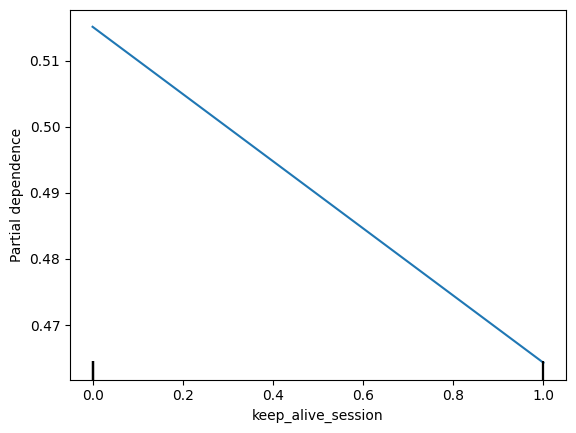

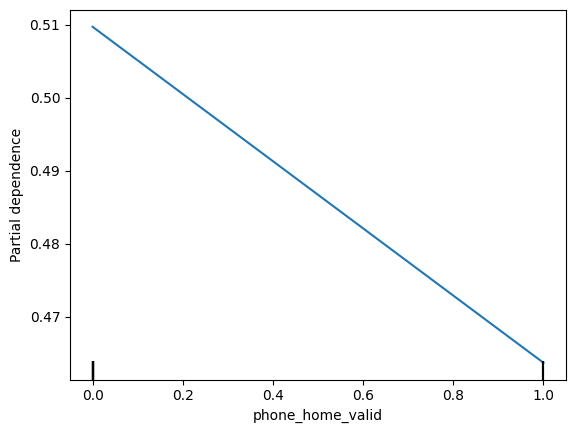

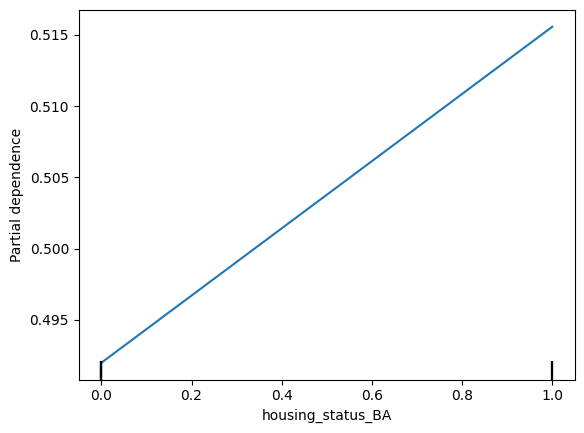

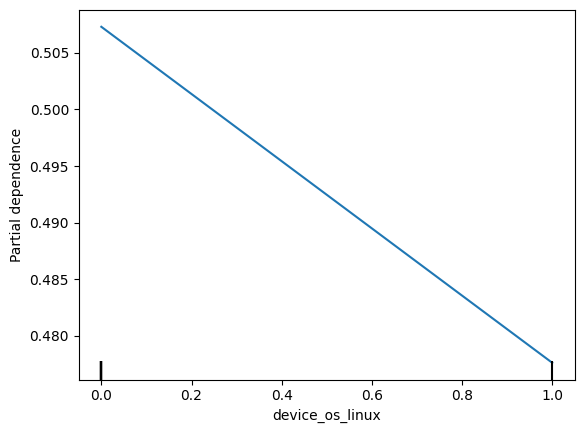

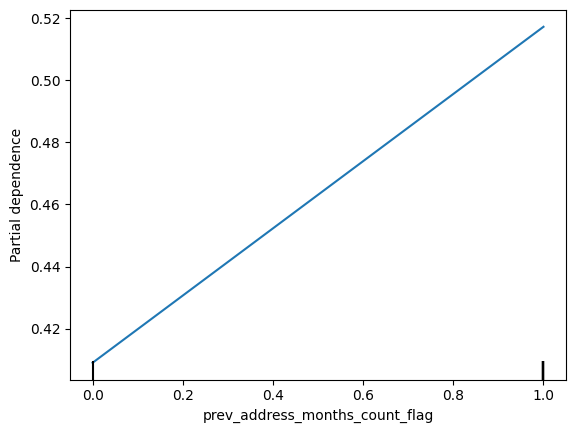

In [31]:
features = df.drop("fraud_bool", axis=1).columns[rf_res.feature_importances_.argsort()[::-1]][:5]

for feature in features:
    PartialDependenceDisplay.from_estimator(
        xgb,
        X_res,
        [feature],
        subsample=10000,  
        n_jobs=-1,  
        grid_resolution=100, 
        random_state=42,
    )





### Logistic Regression
In an effort to get more intuition about the interpretablity of results, we will also train a logistic regression model. 

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

We now need to scale the data for the logistic regression model.

In [33]:
numerical_columns = [col for col in df.columns if df[col].unique().shape[0]>10 and col not in categorical_columns]

In [34]:
scaler = ColumnTransformer([
    ('scaler', StandardScaler(), numerical_columns)
], remainder='passthrough')

X_res_scaled = scaler.fit_transform(X_res)


In [35]:
lr = LogisticRegression(max_iter=10000, penalty="l2")

In [36]:
lr.fit(X_res_scaled, y_res)

LogisticRegression(max_iter=10000)

In [37]:
lr.score(scaler.fit_transform(val_df.drop("fraud_bool", axis=1)), val_df["fraud_bool"])

0.950825

In [38]:
lr.score(scaler.fit_transform(only_fraud.drop("fraud_bool", axis=1)), only_fraud["fraud_bool"])

0.3044070876874148

In [39]:
#auc
roc_auc_score(val_df["fraud_bool"], lr.predict_proba(scaler.fit_transform(val_df.drop("fraud_bool", axis=1)))[:,1])


0.8317898261370471

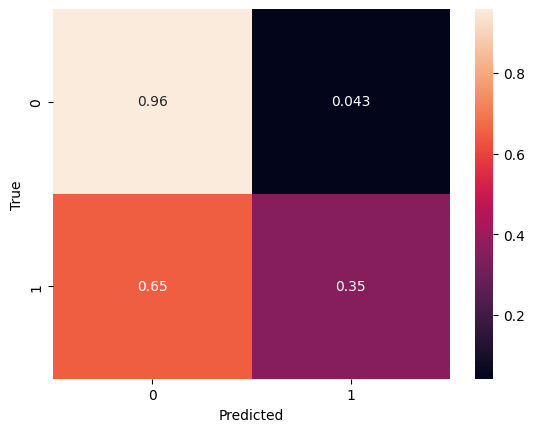

In [40]:

plot_confusion_matrix(val_df["fraud_bool"], lr.predict(scaler.fit_transform(val_df.drop("fraud_bool", axis=1))))

In [41]:
coefs = pd.DataFrame(lr.coef_, columns=df.drop("fraud_bool", axis=1).columns).T

In [42]:
coefs.columns = ["coef"]
coefs = coefs.sort_values("coef", ascending=False)

coefs["Odds Ratio"] = np.exp(coefs["coef"])

Text(0.5, 1.0, 'Logistic Regression Coefficients ')

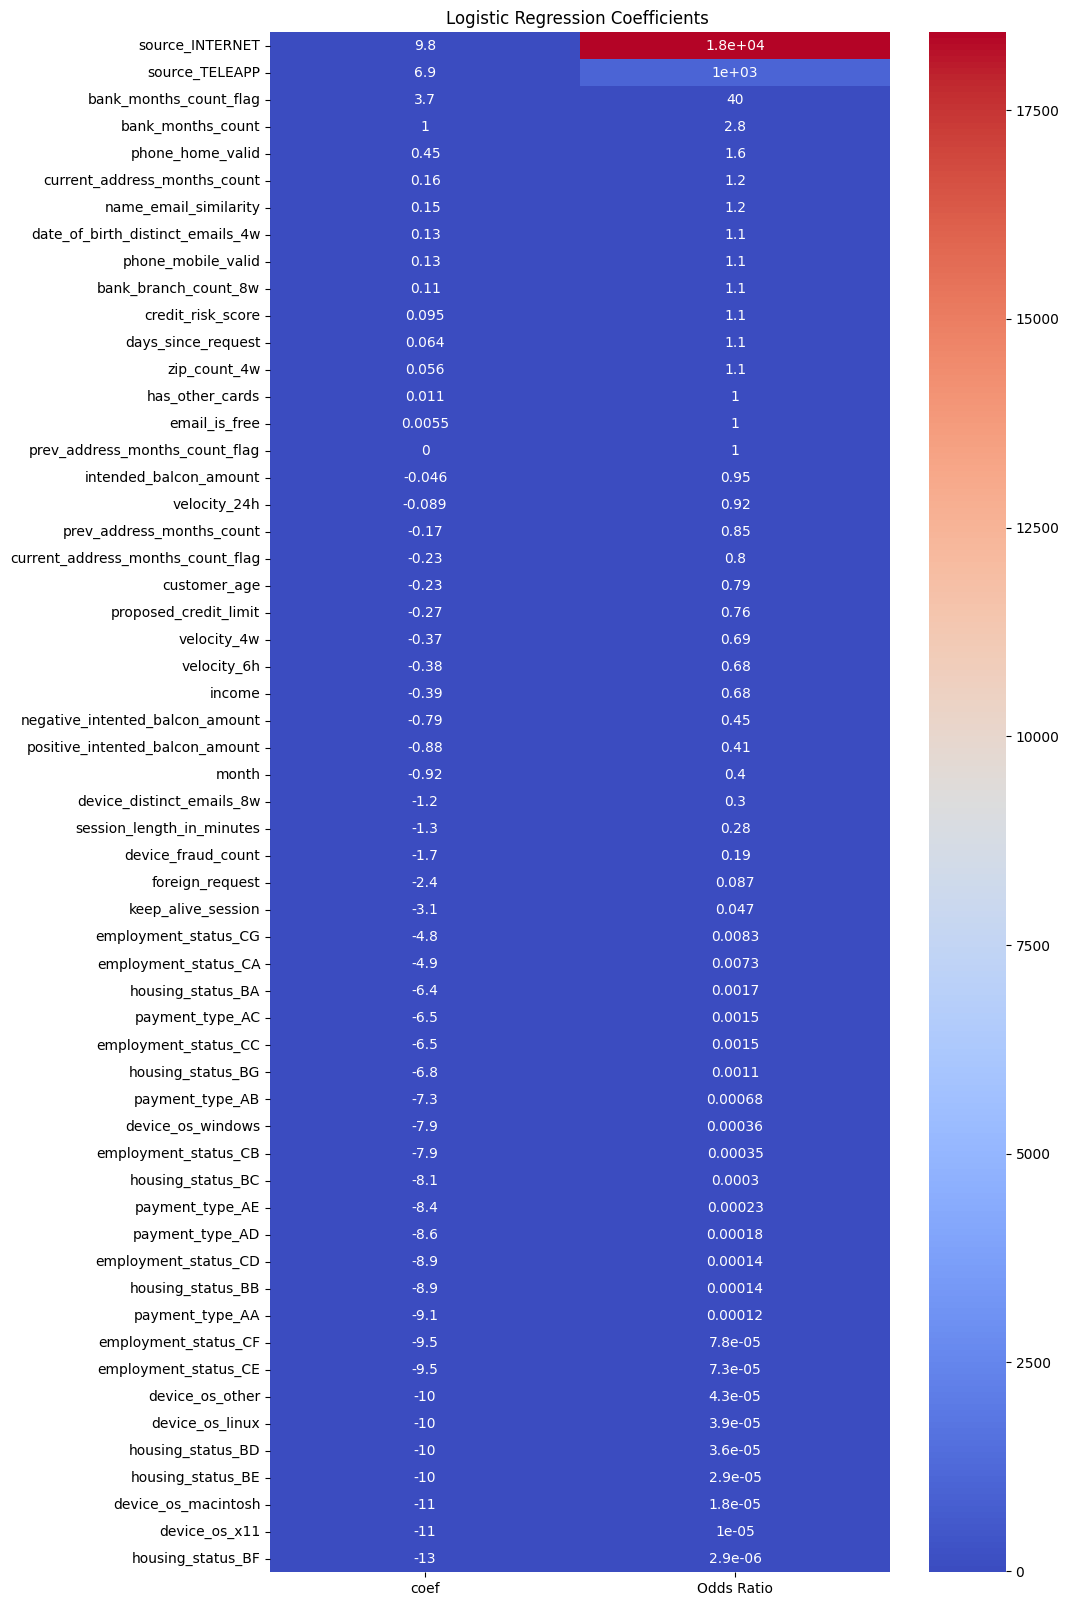

In [43]:
plt.figure(figsize=(10,20))
ax=sns.heatmap(coefs, annot=True, cmap="coolwarm")
ax.set_title("Logistic Regression Coefficients ")

Text(0.5, 1.0, 'Logistic Regression Coefficients without overfit features')

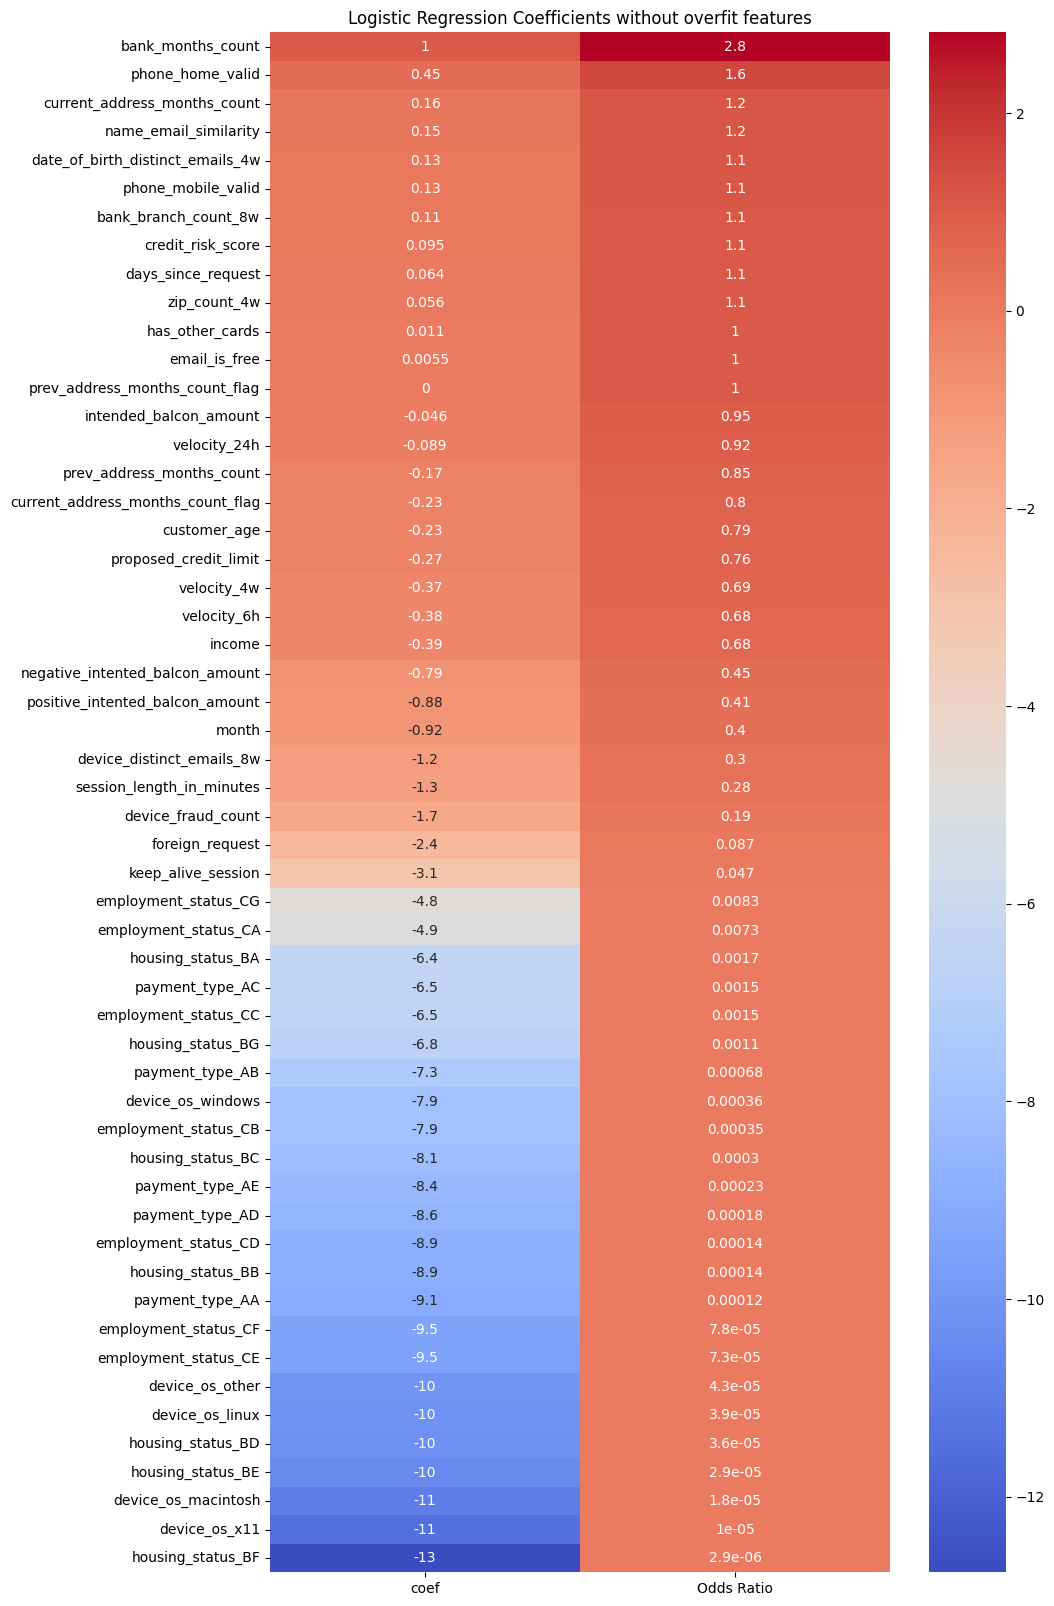

In [44]:
plt.figure(figsize=(10,20))

ax = sns.heatmap(coefs.drop(["source_INTERNET","source_TELEAPP", "bank_months_count_flag"]), annot=True, cmap="coolwarm")
ax.set_title("Logistic Regression Coefficients without overfit features")

It seems the bank month count is one of the most important features. However, it should perhaps not be a numerical feature but a categorical feature. The assumption that the fraud rate would have a monotonuous relationship with the bank month count is probably wrong.
We'd have to look a bit deeper into the data to see if we should group the months into seasons to not introduce too many new features as even with SMOTE we have a high risk of overfitting.

We also notice that the regularization parameter is maybe not high enough (or that we got greedy with our oversampling). Indeed, since we have little positive examples, some of the rare categorical features never appear in the positive class. This leads the model to associate an extreme value to the feature. To fix this, we could use a higher regularization parameter, get a bit more involved in the sampling or perhaps eliminate some features. Of course, there maybe isn't a need to fix it, as we can't really tell if the category is actually relevant to the probability of fraud.  

## Conclusion
We have trained a random forest model and a logistic regression model on the data. The random forest model has a 94% accuracy, but only a 40% true positive rate. We improved it slightly using XGBoost. Validation accuracy fell down to 89% but TP rate reached 51%. To better undestand the dataset, we trained a logistic regression model, which has a 96% global accuracy, but only a 36% TP rate. 